In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation

In [2]:
# Clean / Load
sentiments = pd.read_csv("../data/sentiment/sentiment_days.csv")
sentiments.date = pd.to_datetime(sentiments.date, format='%Y-%m-%d')
stocks = pd.read_csv("../data/percent_change/relative_change.csv")
stocks.date = pd.to_datetime(stocks.date, format='%Y%m%d')
stocks.drop(['Unnamed: 0'], axis=1, inplace=True)
stocks = stocks[(stocks.date > '2005-12-31') & (stocks.date < '2017-12-31')]

# Join
sentiments['prior_date']=sentiments.date + datetime.timedelta(days=1)
data = stocks.merge(sentiments, left_on='date', right_on='prior_date', how='inner')
data['label'] = np.where(data['rel_difference_close_open']>0, 1, 0)

# Preview
data.head(3)

,ticker,date_x,close,rel_difference_close_open,rel_difference_close_close,date_y,mode,Sum_QDAP,Sum,Mean_QDAP,Mean,prior_date,label
0,AAC,2006-01-03,1.640,0.015244,0.051829,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03,1
1,AAE,2006-01-03,0.365,0.054795,0.068493,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03,1
2,AAM,2006-01-03,0.255,-0.098039,-0.078431,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03,0


In [27]:
# From: https://enlight.nyc/stock-market-prediction
ticker = 'QAN'
groups = data.groupby('ticker')
tick_dat = groups.get_group(ticker)

forecast_out = int(30)
df = tick_dat.copy();
df = df[['close']]
df['Prediction'] = df[['close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

y = np.array(df['Prediction'])
y = y[:-forecast_out]

# Regression
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

# Training
clf = LinearRegression()
clf.fit(X_train,y_train)

# Testing
pred = clf.predict(X_forecast)
score = clf.score(X_test, y_test)
print("Score: ", score)

Score:  0.9269645084567592


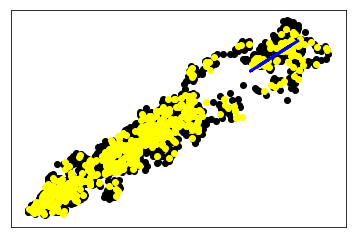

In [28]:
plt.scatter(X_train, y_train,  color='black')
plt.scatter(X_test, y_test,  color='yellow')
plt.plot(X_forecast, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()